In [59]:
!ls ../data

bom_imdb_revenue_concatenated.csv
bom.movie_gross.cleaned_for_concat.csv
bom.movie_gross.csv.gz
columns_in_each_csv.csv
df1_cleaned_for_merge.csv
full_df.csv
full_gross.csv
imdb.name.basics.csv.gz
imdb.title.akas.csv.gz
imdb.title.basics.csv.gz
imdb.title.crew.csv.gz
imdb.title.principals.csv.gz
imdb.title.ratings.cleaned_for_merge.csv
imdb.title.ratings.csv.gz
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.cleaned_for_concatenation.csv
tn.movie_budgets.csv.gz


In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [61]:
gross_df = pd.read_csv('../data/full_gross.csv', index_col='title')

In [62]:
#gross_df = gross_df.drop(columns=['Unnamed: 0'])
gross_df.head()
gross_df.info()

sns.set_style("darkgrid")

<class 'pandas.core.frame.DataFrame'>
Index: 2966 entries, The Legend of Hercules to Edmond
Data columns (total 27 columns):
Unnamed: 0       2966 non-null int64
averagerating    2966 non-null float64
numvotes         2966 non-null int64
genres           2966 non-null object
Sport            2966 non-null bool
Fantasy          2966 non-null bool
Mystery          2966 non-null bool
War              2966 non-null bool
Biography        2966 non-null bool
Drama            2966 non-null bool
Comedy           2966 non-null bool
History          2966 non-null bool
Crime            2966 non-null bool
Horror           2966 non-null bool
Family           2966 non-null bool
Adventure        2966 non-null bool
Romance          2966 non-null bool
Documentary      2966 non-null bool
Sci-Fi           2966 non-null bool
Action           2966 non-null bool
Thriller         2966 non-null bool
Music            2966 non-null bool
Animation        2966 non-null bool
year             2966 non-null int64
dom

In [63]:
gross_df.columns[3:-4]

Index(['genres', 'Sport', 'Fantasy', 'Mystery', 'War', 'Biography', 'Drama',
       'Comedy', 'History', 'Crime', 'Horror', 'Family', 'Adventure',
       'Romance', 'Documentary', 'Sci-Fi', 'Action', 'Thriller', 'Music',
       'Animation'],
      dtype='object')

In [67]:
def genre_descriptive_stats(df, key_col, a, b): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[a:b] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    
    mean = np.round_(mean)
    median = np.round_(median)
    std = np.round_(std)
    
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [70]:
gross_genre_df = genre_descriptive_stats(gross_df, 'dom_gross', 3, -4)

KeyError: "None of [Index(['Action,Adventure,Fantasy', 'Comedy', 'Biography,Drama,Sport',\n       'Drama,Fantasy,Romance', 'Action,Adventure,Thriller',\n       'Action,Comedy,Crime', 'Comedy,Drama,Romance', 'Comedy,Drama,Romance',\n       'Fantasy,Horror,Thriller', 'Comedy,Crime,History',\n       ...\n       'Thriller', 'Drama', 'Adventure,Comedy,Drama', 'Action,Adventure',\n       'Action,Drama,Romance', 'Action,Drama,Thriller', 'Documentary',\n       'Biography,Drama', 'Crime,Drama,Thriller', 'Comedy,Drama,History'],\n      dtype='object', name='title', length=2966)] are in the [index]"

In [ ]:
display(gross_genre_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

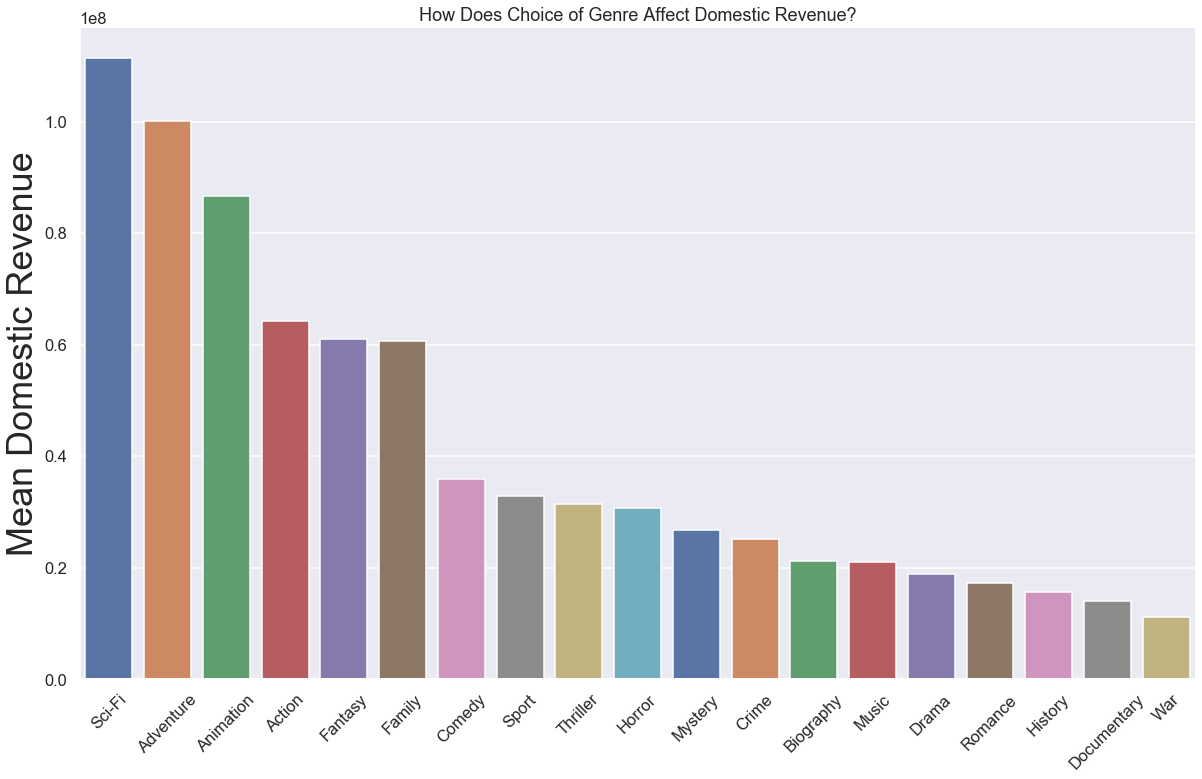

In [68]:
#mean gross income plot
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_sorted = gross_genre_df['mean'].sort_values(ascending=False)
sns.barplot(x=mean_series_sorted.index, y=mean_series_sorted, ax=ax, palette='deep')

sns.set_context("talk", rc={"axes.labelsize":36})

plt.title("How Does Choice of Genre Affect Domestic Revenue?")
plt.ylabel("Mean Domestic Revenue")
plt.xticks(rotation=45)

Text(0, 0.5, 'Mean Domestic Revenue')

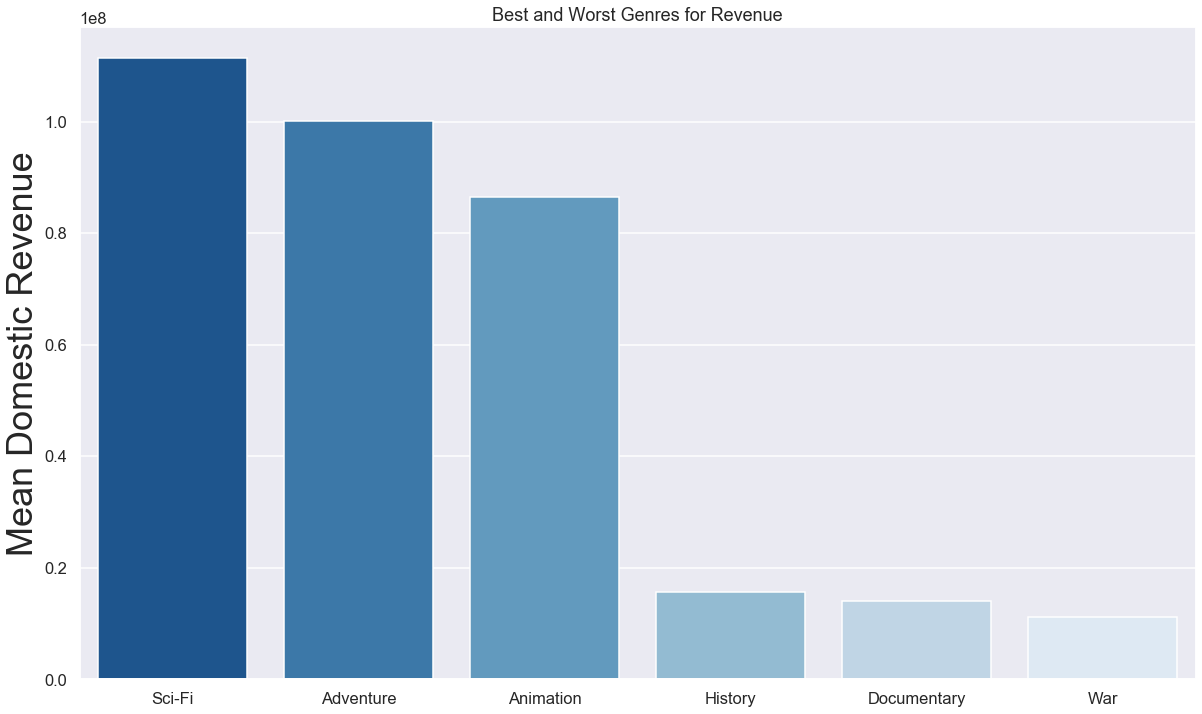

In [72]:
#best/worst mean plots
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
mean_series_top_bottom = pd.concat([mean_series_sorted.head(3), mean_series_sorted.tail(3)])
sns.barplot(x=mean_series_top_bottom.index, y=mean_series_top_bottom, ax=ax, palette=sns.color_palette("Blues_r"))

plt.title("Best and Worst Genres for Revenue")
plt.ylabel("Mean Domestic Revenue")

In [ ]:
#mean numvotes plot

